In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("C:/Users/Wahab/Documents/DSA/Sales_add.csv")
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [7]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [8]:
from statsmodels.stats.weightstats import ztest

In [9]:
z_stat,p_val=ztest(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],value=0)

In [10]:
p_val

1.3046367348248653e-38

In [11]:
if p_val<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Rejected


# Since null hypothesis rejected, there is an increase in sales afterstepping into digital marketing.

In [12]:
data.dtypes

Month                             object
Region                            object
Manager                           object
Sales_before_digital_add(in $)     int64
Sales_After_digital_add(in $)      int64
dtype: object

In [13]:
contigency= pd.crosstab(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])
contigency

Sales_After_digital_add(in $),187305,191517,193735,203175,205180,212579,222106,223334,226261,227040,...,231808,234908,243020,244243,253131,256948,258402,263388,270390,276279
Sales_before_digital_add(in $),,,,,,,,,,,,,,,,,,,,,
130263,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
130625,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132135,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
140862,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
141956,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145062,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Sales_After_digital_add(in $)', ylabel='Sales_before_digital_add(in $)'>

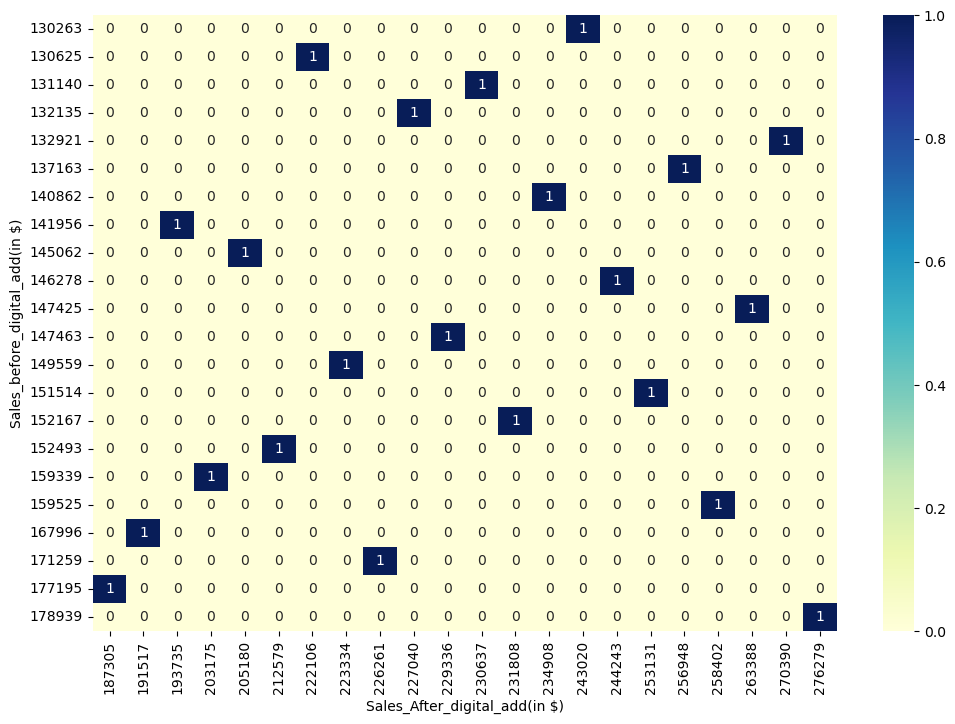

In [14]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

### Question 2

The company needs to check whether there is any dependency between
thefeatures “Region” and “Manager”.

In [47]:
import scipy.stats as stats

In [49]:
contigency1= pd.crosstab(data['Region'], data['Manager'])
contigency1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [50]:
contigency_pct = pd.crosstab(data['Region'], data['Manager'], normalize='index')
contigency_pct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


<AxesSubplot:xlabel='Sales_After_digital_add(in $)', ylabel='Sales_before_digital_add(in $)'>

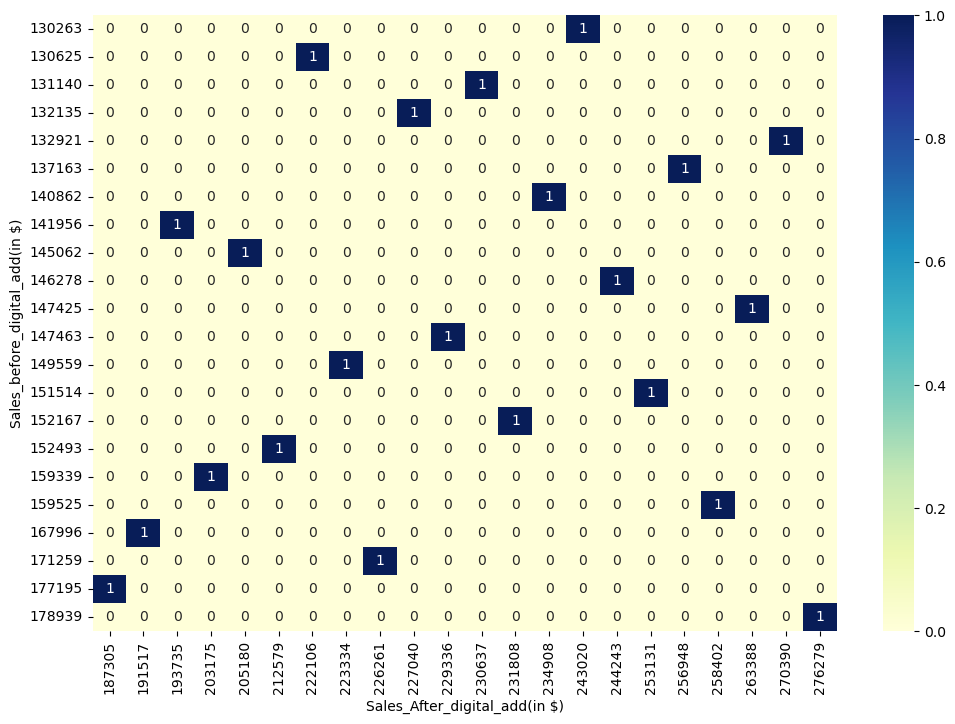

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [70]:
from scipy.stats import chisquare

In [71]:
from scipy.stats import chi2_contingency

In [75]:
chi2_stat,pval,dof,exp = chi2_contingency(contigency1)


In [76]:
pval

0.5493991051158094

In [78]:
if pval<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Accepted
